<a href="https://colab.research.google.com/github/anviol/examplesFiap/blob/main/Fiap_Data_Analytics_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introdução

### Fase 1 A

## Fase 1 A Aula 1 a 3

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.ticker as ticker

In [4]:
import chardet

In [5]:
import os

In [6]:
import numpy as np

In [7]:
meses_pt_to_en = {
    'Jan': 'Jan', 'Fev': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr',
    'Mai': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'
}

In [8]:
# Mapeamento dos estados para as regiões do Brasil

regioes = {
  '35 São Paulo': 'Sudeste',
  '31 Minas Gerais': 'Sudeste',
  '41 Paraná': 'Sul',
  '43 Rio Grande do Sul': 'Sul',
  '33 Rio de Janeiro': 'Sudeste',
  '29 Bahia': 'Nordeste',
  '26 Pernambuco': 'Nordeste',
  '42 Santa Catarina': 'Sul',
  '23 Ceará': 'Nordeste',
  '52 Goiás': 'Centro-Oeste',
  '15 Pará': 'Norte',
  '21 Maranhão': 'Nordeste',
  '32 Espírito Santo': 'Sudeste',
  '24 Rio Grande do Norte': 'Nordeste',
  '53 Distrito Federal': 'Centro-Oeste',
  '25 Paraíba': 'Nordeste',
  '50 Mato Grosso do Sul': 'Centro-Oeste',
  '22 Piauí': 'Nordeste',
  '51 Mato Grosso': 'Centro-Oeste',
  '27 Alagoas': 'Nordeste',
  '13 Amazonas': 'Norte',
  '28 Sergipe': 'Nordeste',
  '11 Rondônia': 'Norte',
  '17 Tocantins': 'Norte',
  '12 Acre': 'Norte',
  '14 Roraima': 'Norte',
  '16 Amapá': 'Norte'
}

In [9]:
# prompt: Como faço para que toda vez que monte o COLAB ele monte uma pasta especidica do meu drive para não precisar ficar subindo arquivo toda vez

from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# csv_file_path = "sih_cnv_qiuf080435201_17_158_77.csv"
csv_file_path = "/content/drive/MyDrive/Fiap/Fase 1 A Aula 1/sih_cnv_qiuf080435201_17_158_77.csv"

In [11]:
with open (csv_file_path, "rb") as file:
  bytes = file.read(100)

In [12]:
encoding_file = chardet.detect(bytes)
print(encoding_file)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [13]:
print(encoding_file.get("encoding"))

ISO-8859-1


In [14]:
# prompt: ler um aquivo CSV "com padrões de dados brasileiros

if os.path.exists(csv_file_path):
  dados = pd.read_csv(csv_file_path
                      , engine="python"
                      , encoding=encoding_file.get("encoding")
                      , sep=";"
                      , decimal=","
                      , thousands="."
                      , skiprows=3
                      , skipfooter=12)
  print("Arquivo carregado!")
else:
  print("Erro: Arquivo não encontrado!")

Arquivo carregado!


In [15]:
# Tirar todos '-' do dados e substituir por null
dados = dados.replace('-', np.nan)

In [16]:
pd.options.display.float_format = "{:.2f}".format

In [17]:
# Verificar as primeiras 5 linhas do arquivo
# dados.head()

In [18]:
# Verificar as 5 últimas linhas do arquivo
# dados.tail()

In [19]:
# Retorna a médias dos dados por coluna
# dados.mean()

In [20]:
## Desafio de retornar os dados apenas da coluna mais recente
# Retornar somente as colunas que são as datas
colunas_datas = [col for col in dados.columns if "/" in col]

# Converter os nomes das colunas de data para o tipo datetime para facilitar a comparação
# Nessesario criar uma tabela de conversão dos meses em inglês para os meses em portuguÊs
colunas_datas_dt = {col: pd.to_datetime(col.split('/')[0] + '/' + meses_pt_to_en[col.split('/')[1]], format='%Y/%b', errors='coerce') for col in colunas_datas}

# Das datas retornada retorna a maior data
colunas_datas_dt_max = max(colunas_datas_dt, key=colunas_datas_dt.get)

# Retorna a primeira coluna para que os dados faça sentido
primeira_coluna_indice = dados.columns[0]

# Mostra a primeira coluna e a com os dados do mês mais recente
dados_ultimo_mes = dados[[primeira_coluna_indice,colunas_datas_dt_max]]



In [21]:
print(dados.dtypes)

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2023/Nov                float64
2023/Dez                float64
2024/Jan                float64
2024/Fev                 object
Total                   float64
Length: 322, dtype: object


In [22]:
# Substituindo traços por NaN, coloquei isso no tratamento iniciar do dados
# , mas vou deixar aqui para saber porque fiz
dados_ultimo_mes[colunas_datas_dt_max] = dados_ultimo_mes[colunas_datas_dt_max].replace('-', np.nan)

# Convertendo a coluna para float
dados_ultimo_mes[colunas_datas_dt_max] = pd.to_numeric(dados[colunas_datas_dt_max], errors='coerce')

# dados_ultimo_mes

<ipython-input-22-2928805b0231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ultimo_mes[colunas_datas_dt_max] = dados_ultimo_mes[colunas_datas_dt_max].replace('-', np.nan)
<ipython-input-22-2928805b0231>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ultimo_mes[colunas_datas_dt_max] = pd.to_numeric(dados[colunas_datas_dt_max], errors='coerce')


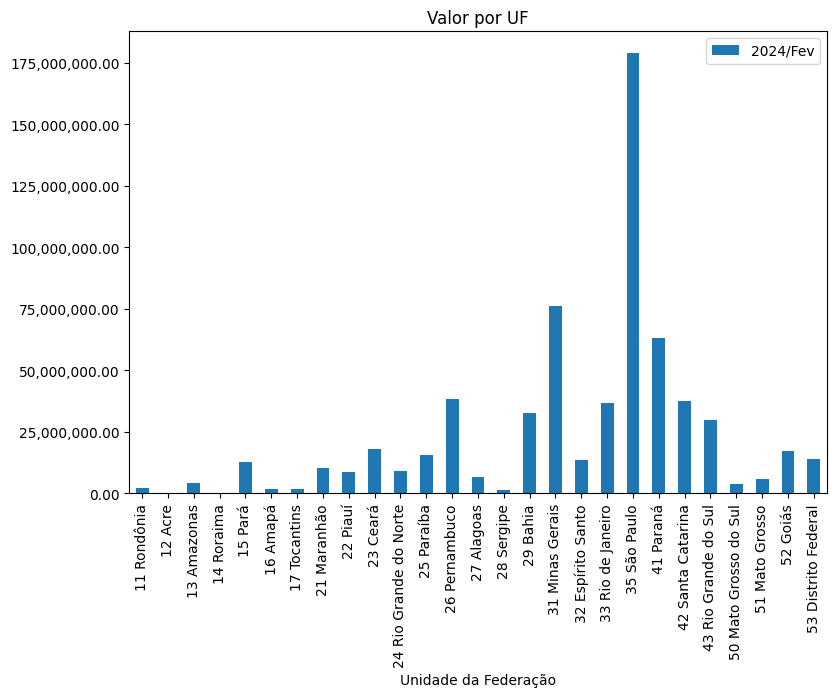

In [23]:
# Acomapnhamento da aula e por coencidência já com o desafio
axis = dados_ultimo_mes.plot(
    x=primeira_coluna_indice
    , y=colunas_datas_dt_max
    , kind='bar'
    , figsize=(9,6)
    )

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por UF")

plt.show()

In [24]:
dados[[primeira_coluna_indice, "2024/Jan", colunas_datas_dt_max]]

,Unidade da Federação,2024/Jan,2024/Fev
0,11 Rondônia,4679483.21,2120681.21
1,12 Acre,1645029.75,NaN
2,13 Amazonas,12202046.72,4432648.45
3,14 Roraima,139197.00,30871.79
4,15 Pará,32207932.35,12764349.97
5,16 Amapá,3580839.99,1862908.67
6,17 Tocantins,4163240.80,1927114.47
7,21 Maranhão,25694695.26,10384588.46
8,22 Piauí,15451295.00,8750445.77
9,23 Ceará,42210082.51,17876377.79


In [25]:
colunas_usaveis = dados.select_dtypes(include=[np.number]).columns
colunas_usaveis = colunas_usaveis.insert(0, primeira_coluna_indice)

In [26]:
dados_usaveis = dados [colunas_usaveis]
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,12528277.58,12009682.89,11892438.13,12738935.36,12321864.25,11992095.42,10634986.68,7412343.68,4679483.21,1405327626.00
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4861672.52,5282731.30,4830246.24,4927419.44,4343307.40,4309009.78,3932902.80,3104693.52,1645029.75,592086480.70
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,22951007.22,22636889.89,22193695.49,21766364.65,16711278.03,17304073.69,18648068.91,15690596.88,12202046.72,2633903286.60
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,4915988.80,4097022.28,4018570.16,3697526.77,2597739.65,1880717.52,1666645.58,177643.32,139197.00,454137573.42
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,52730638.02,49590069.75,49846979.03,52554367.30,51872116.58,52501323.39,56741733.74,41764128.08,32207932.35,6371438493.34


In [27]:
dados_usaveis = dados_usaveis.set_index(primeira_coluna_indice)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12528277.58,12009682.89,11892438.13,12738935.36,12321864.25,11992095.42,10634986.68,7412343.68,4679483.21,1405327626.00
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4861672.52,5282731.30,4830246.24,4927419.44,4343307.40,4309009.78,3932902.80,3104693.52,1645029.75,592086480.70
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,22951007.22,22636889.89,22193695.49,21766364.65,16711278.03,17304073.69,18648068.91,15690596.88,12202046.72,2633903286.60
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,4915988.80,4097022.28,4018570.16,3697526.77,2597739.65,1880717.52,1666645.58,177643.32,139197.00,454137573.42
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,52730638.02,49590069.75,49846979.03,52554367.30,51872116.58,52501323.39,56741733.74,41764128.08,32207932.35,6371438493.34


In [28]:
dados_usaveis["2024/Jan"].head()

Unidade da Federação
11 Rondônia    4679483.21
12 Acre        1645029.75
13 Amazonas   12202046.72
14 Roraima      139197.00
15 Pará       32207932.35
Name: 2024/Jan, dtype: float64

In [29]:
dados_usaveis.loc["31 Minas Gerais"]

2007/Ago        971394.37
2007/Set       2861781.50
2007/Out      10018011.35
2007/Nov      21730281.63
2007/Dez      43429517.54
                ...      
2023/Out     223870907.80
2023/Nov     210645756.95
2023/Dez     184552664.46
2024/Jan     157534406.37
Total      27796524022.60
Name: 31 Minas Gerais, Length: 199, dtype: float64

In [30]:
dados_usaveis.iloc[16]

2007/Ago        971394.37
2007/Set       2861781.50
2007/Out      10018011.35
2007/Nov      21730281.63
2007/Dez      43429517.54
                ...      
2023/Out     223870907.80
2023/Nov     210645756.95
2023/Dez     184552664.46
2024/Jan     157534406.37
Total      27796524022.60
Name: 31 Minas Gerais, Length: 199, dtype: float64

In [31]:
dados_usaveis = dados_usaveis.drop("Total", axis=1)

dados_usaveis.columns

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2023/Abr', '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set',
       '2023/Out', '2023/Nov', '2023/Dez', '2024/Jan'],
      dtype='object', length=198)

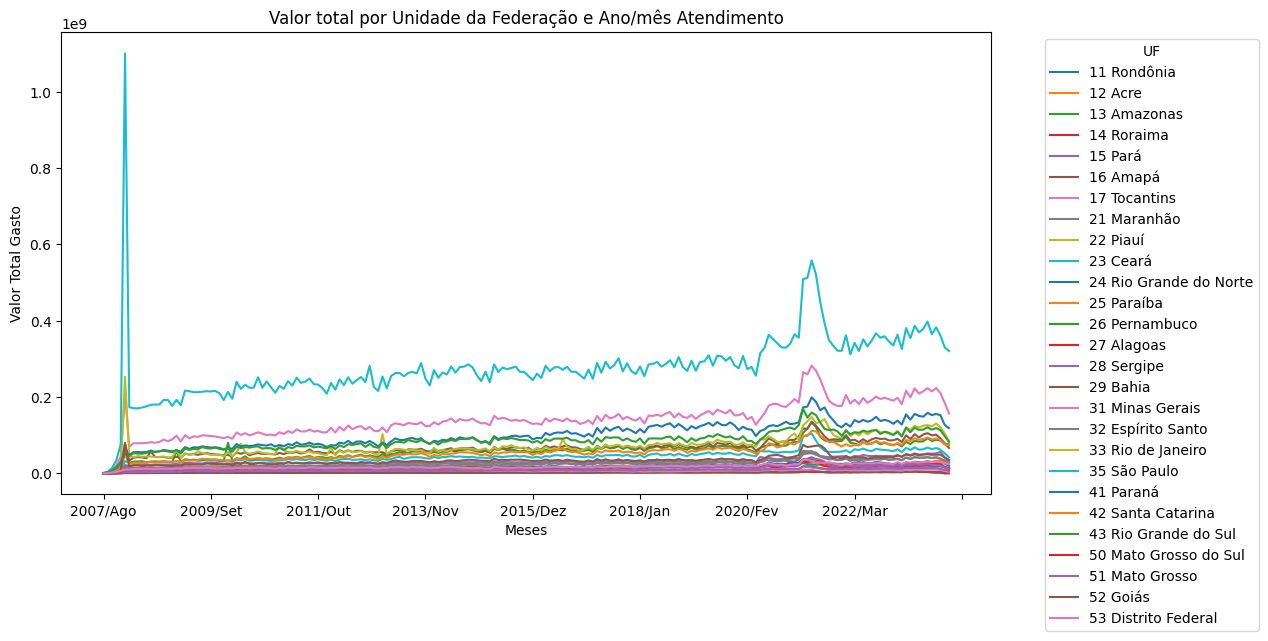

In [32]:
# Desafio da aula 3 video 1
axis = dados_usaveis.T.plot(title="Valor total por Unidade da Federação e Ano/mês Atendimento", figsize=(12,6))

axis.legend(title="UF", bbox_to_anchor=(1.05, 1), loc='upper left')

axis.set_xlabel("Meses")

axis.set_ylabel("Valor Total Gasto")

plt.show()

In [33]:
np.random.seed(524387)

dados_usaveis_aleatorios = dados_usaveis.sample(n=7)

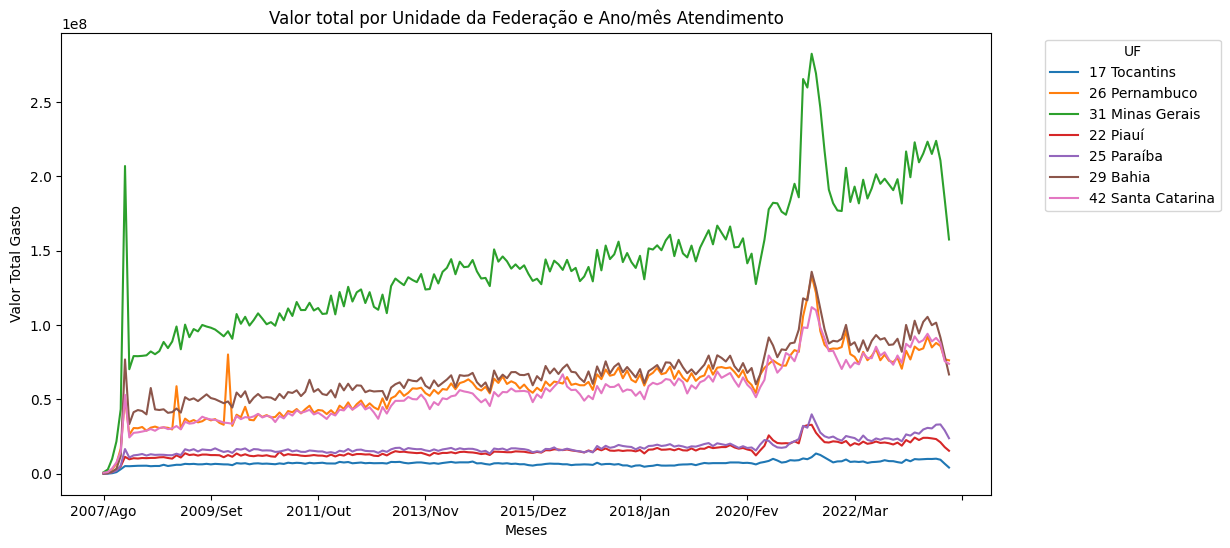

In [34]:
# Desafio da aula 3 video 1
axis = dados_usaveis_aleatorios.T.plot(title="Valor total por Unidade da Federação e Ano/mês Atendimento", figsize=(12,6))

axis.legend(title="UF", bbox_to_anchor=(1.05, 1), loc='upper left')

axis.set_xlabel("Meses")

axis.set_ylabel("Valor Total Gasto")

plt.show()

In [35]:
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12528277.58,12009682.89,11892438.13,12738935.36,12321864.25,11992095.42,10634986.68,7412343.68,4679483.21,1403206340.46
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4861672.52,5282731.30,4830246.24,4927419.44,4343307.40,4309009.78,3932902.80,3104693.52,1645029.75,592085196.88
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,22951007.22,22636889.89,22193695.49,21766364.65,16711278.03,17304073.69,18648068.91,15690596.88,12202046.72,2629467806.74
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,4915988.80,4097022.28,4018570.16,3697526.77,2597739.65,1880717.52,1666645.58,177643.32,139197.00,454106287.94
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,52730638.02,49590069.75,49846979.03,52554367.30,51872116.58,52501323.39,56741733.74,41764128.08,32207932.35,6358655607.77


In [36]:
# Desafio Aula 3 video 2
# Desafio de incluir a região, para isso tive que criar um dicionario no inicio desse notebook

if 'Região' not in dados_usaveis.columns:
  dados_usaveis['Região'] = dados_usaveis.index.map(regioes)

# Desafio de incluir outro estado nos estados aleatórios selecionados

np.random.seed(524387)
dados_usaveis_aleatorios = dados_usaveis.sample(n=7)

dados_usaveis_aleatorios.loc['53 Distrito Federal'] = dados_usaveis.loc['53 Distrito Federal'].values

# Desafio de ordernar pela coluna Total

dados_usaveis_aleatorios.sort_values(by='Total', ascending=False, inplace=True)

# dados_usaveis_aleatorios = dados_usaveis_aleatorios.append(dados_usaveis.loc[0], ignore_index=True)

dados_usaveis_aleatorios

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,209426107.11,215330071.63,223305899.96,215057632.27,223870907.80,210645756.95,184552664.46,157534406.37,27719657781.50,Sudeste
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,76852059.28,33410124.06,41392237.05,42826993.62,42161494.78,...,94300554.24,102141455.89,105499864.51,99896388.46,101608845.69,91679787.42,79138403.22,66763134.11,13169536310.30,Nordeste
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,83197702.10,84284907.80,92300733.35,84939369.49,87955970.55,85933309.86,76975283.61,76279745.09,11595827966.05,Nordeste
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,88272411.10,89822399.05,94106737.59,88970271.55,91362163.62,87824441.82,75643712.02,73940905.69,10841634808.60,Sul
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,28340217.18,29546608.45,30872293.43,29671334.34,30016112.60,29950599.19,26040219.91,24995324.43,3558221304.24,Centro-Oeste
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,26911662.03,29740088.51,30845242.31,30467561.72,32993849.42,33147073.00,29154064.38,23886146.75,3541078970.09,Nordeste
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,22658910.57,24150590.44,24145675.22,23768377.08,23307999.11,21156665.97,17893545.11,15451295.00,3067053538.58,Nordeste
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,9612631.73,9812714.43,9952144.94,9915381.77,10107345.21,9406815.41,6722985.04,4163240.80,1380245393.82,Norte


In [37]:
colunas_desejadas = dados_usaveis_aleatorios.columns[6:]

dados_usaveis_aleatorios = dados_usaveis_aleatorios[colunas_desejadas]

dados_usaveis_aleatorios = dados_usaveis_aleatorios.drop('Total', axis=1)

dados_usaveis_aleatorios = dados_usaveis_aleatorios.drop('Região', axis=1)

dados_usaveis_aleatorios

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79632111.54,82225138.22,80374117.08,82442262.90,88613476.60,84486996.11,...,199387724.62,222871767.16,209426107.11,215330071.63,223305899.96,215057632.27,223870907.80,210645756.95,184552664.46,157534406.37
29 Bahia,33410124.06,41392237.05,42826993.62,42161494.78,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,...,90008010.34,102912882.08,94300554.24,102141455.89,105499864.51,99896388.46,101608845.69,91679787.42,79138403.22,66763134.11
26 Pernambuco,26222079.10,30716361.81,30589332.79,31424612.72,28947510.92,30985515.77,31705296.79,30703879.20,31165074.59,30889234.12,...,76843643.03,85511475.75,83197702.10,84284907.80,92300733.35,84939369.49,87955970.55,85933309.86,76975283.61,76279745.09
42 Santa Catarina,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,...,85015468.89,92360735.21,88272411.10,89822399.05,94106737.59,88970271.55,91362163.62,87824441.82,75643712.02,73940905.69
53 Distrito Federal,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,...,28463928.34,29919839.16,28340217.18,29546608.45,30872293.43,29671334.34,30016112.60,29950599.19,26040219.91,24995324.43
25 Paraíba,10871589.62,12348758.14,12680965.13,13258411.71,12246686.33,13090842.60,12673774.35,12790639.17,12727661.14,12458082.28,...,25608560.61,27755853.91,26911662.03,29740088.51,30845242.31,30467561.72,32993849.42,33147073.00,29154064.38,23886146.75
22 Piauí,9711680.20,10428191.09,10227943.00,10562148.66,10465088.93,10618079.70,10645917.52,11037940.55,11143375.71,10583049.66,...,21064033.49,24294958.01,22658910.57,24150590.44,24145675.22,23768377.08,23307999.11,21156665.97,17893545.11,15451295.00
17 Tocantins,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,...,8387001.61,9839564.73,9612631.73,9812714.43,9952144.94,9915381.77,10107345.21,9406815.41,6722985.04,4163240.80


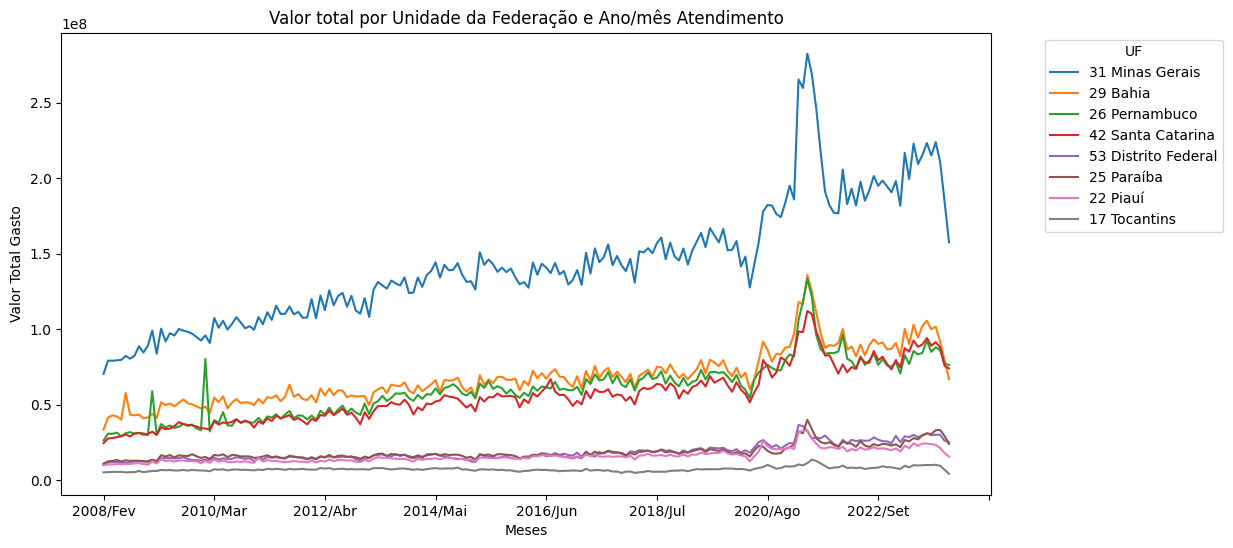

In [38]:
axis = dados_usaveis_aleatorios.T.plot(title="Valor total por Unidade da Federação e Ano/mês Atendimento", figsize=(12,6))

axis.legend(title="UF", bbox_to_anchor=(1.05, 1), loc='upper left')

axis.set_xlabel("Meses")

axis.set_ylabel("Valor Total Gasto")

plt.show()

## Fase 1 A Aula 4

In [39]:
def plota_gastos_por_mes(dados, figsize=(12,6), ylim=(0,300)):
  axis = dados.T.plot(title="Valor total por Unidade da Federação e Ano/mês Atendimento", figsize=figsize)
  axis.legend(title="UF", bbox_to_anchor=(1.05, 1), loc='upper left')
  axis.set_xlabel("Meses")
  axis.set_ylabel("Valor Total Gasto (Milhões R$)")
  axis.set_ylim(ylim)
# Deasfio colocar ticks verticais a caada 12 meses
  plt.xticks(rotation=45)
  xticks = np.arange(0, len(dados.columns), 12)
  axis.set_xticks(xticks)
# Desafio melhorar a palheta de cores

# Desafio incluir grid
  axis.minorticks_on()
  axis.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [40]:
# Colocando os valores na casa do milhãres de reais, vou chamar os dados agora de DUA (dados_usaveis_aleatorios)
DUA_Milhoes = dados_usaveis_aleatorios / 1000000

In [41]:
# Pegando apenas os dados de 2012/Jan à 2023/Dez
meses_012012_a_122023 = DUA_Milhoes.columns[47:191]
DUA_Milhoes_012012_a_122023 = DUA_Milhoes[meses_012012_a_122023]
DUA_Milhoes_012012_a_122023

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,119.86,107.16,122.20,112.57,125.69,115.81,122.01,123.96,114.79,122.10,...,216.72,199.39,222.87,209.43,215.33,223.31,215.06,223.87,210.65,184.55
29 Bahia,56.24,51.30,60.63,56.05,60.52,56.24,59.43,59.22,54.81,56.00,...,100.07,90.01,102.91,94.30,102.14,105.50,99.90,101.61,91.68,79.14
26 Pernambuco,42.71,39.88,45.79,43.58,47.98,43.14,46.77,49.24,44.63,47.33,...,82.74,76.84,85.51,83.20,84.28,92.30,84.94,87.96,85.93,76.98
42 Santa Catarina,40.49,39.17,43.07,42.58,45.92,43.11,45.06,47.25,43.24,44.69,...,87.38,85.02,92.36,88.27,89.82,94.11,88.97,91.36,87.82,75.64
53 Distrito Federal,15.24,14.06,15.76,15.26,15.57,15.12,15.05,15.50,15.24,15.81,...,28.98,28.46,29.92,28.34,29.55,30.87,29.67,30.02,29.95,26.04
25 Paraíba,14.50,13.79,15.45,14.87,16.62,14.90,16.06,16.22,15.37,15.17,...,26.46,25.61,27.76,26.91,29.74,30.85,30.47,32.99,33.15,29.15
22 Piauí,12.83,11.61,12.74,12.21,13.64,12.51,13.24,13.24,12.92,13.01,...,22.64,21.06,24.29,22.66,24.15,24.15,23.77,23.31,21.16,17.89
17 Tocantins,6.91,6.86,7.96,7.57,7.87,7.03,7.31,7.53,7.07,7.25,...,9.42,8.39,9.84,9.61,9.81,9.95,9.92,10.11,9.41,6.72


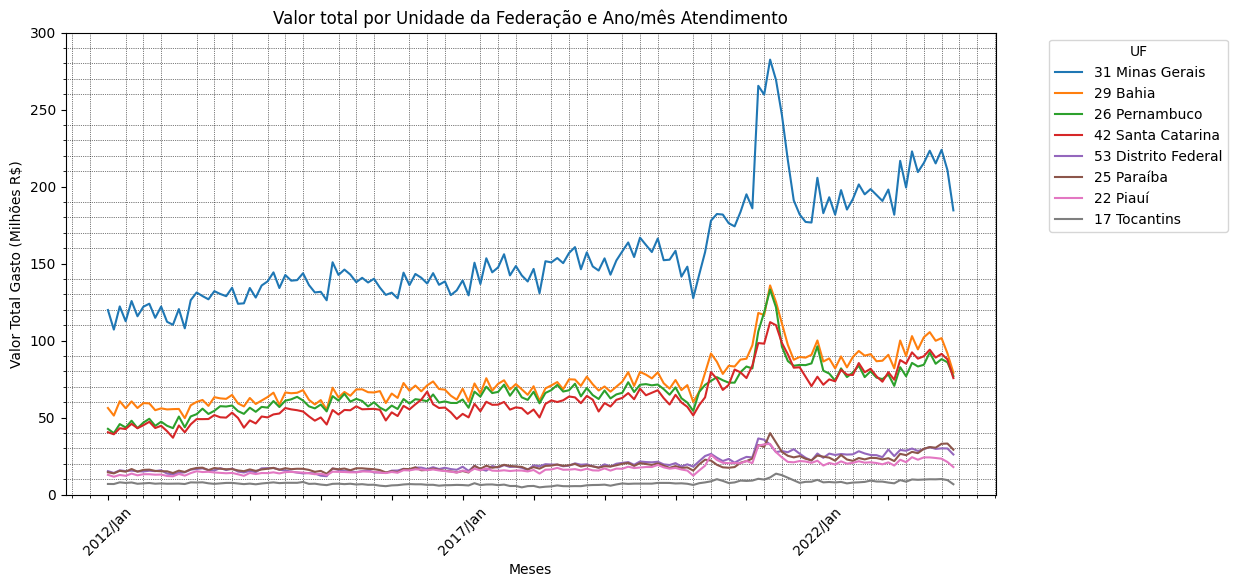

In [42]:
plota_gastos_por_mes(DUA_Milhoes_012012_a_122023)

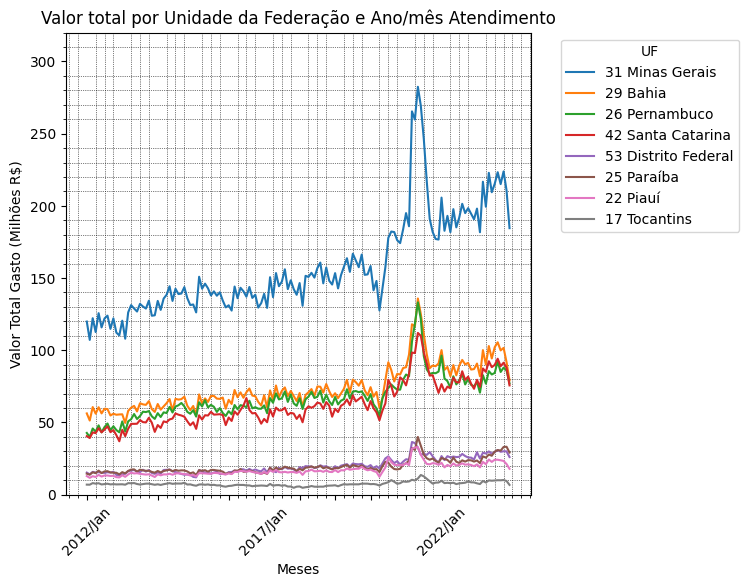

In [43]:
plota_gastos_por_mes(DUA_Milhoes_012012_a_122023, (6, 6), (0, 320))

### Fase 1 B

## Fase 1 B Aula 1

In [44]:
ibge_estimativa_uf = pd.read_excel("/content/drive/MyDrive/Fiap/Fase 1 B Aula 1/estimativa_dou_2020_UF_ajustado.xls")

In [45]:
ibge_estimativa_municipio = pd.read_excel("/content/drive/MyDrive/Fiap/Fase 1 B Aula 1/estimativa_dou_2020_Municipio_ajustado.xls")

In [46]:
ibge_estimativa_uf.columns = ["uf", "regiao", "populacao"]

In [47]:
dados_saude = dados[[primeira_coluna_indice,'2020/Jul']]
dados_saude['Unidade da Federação'] = dados_saude['Unidade da Federação'].str[3:]
dados_saude.columns = ["uf", "valor"]

<ipython-input-47-351ff824f886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_saude['Unidade da Federação'] = dados_saude['Unidade da Federação'].str[3:]


In [48]:
ibge_estimativa_uf = ibge_estimativa_uf.set_index("uf")
dados_saude = dados_saude.set_index("uf")
display(ibge_estimativa_uf.index)
display(dados_saude.index)

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='uf')

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='uf')

In [49]:
gastos_e_populacao = ibge_estimativa_uf.join(dados_saude)

## Fase 1 B Aula 2

In [50]:
gastos_e_populacao = gastos_e_populacao.sort_values(by='valor', ascending=False)

In [51]:
gastos_e_populacao['per_capita'] = gastos_e_populacao['valor']/gastos_e_populacao['populacao']

In [52]:
gastos_e_populacao = gastos_e_populacao.sort_values(by='per_capita', ascending=False)

In [53]:
def plota_gastos_por_habitante(dados, figsize=(12,6)):
  axis = dados.plot(kind="bar", title="Gastos por Habitante", figsize=figsize)
  axis.set_xlabel("Unidade da Federação")
  axis.set_ylabel("R$ por Habitante")
  plt.xticks(rotation=90)

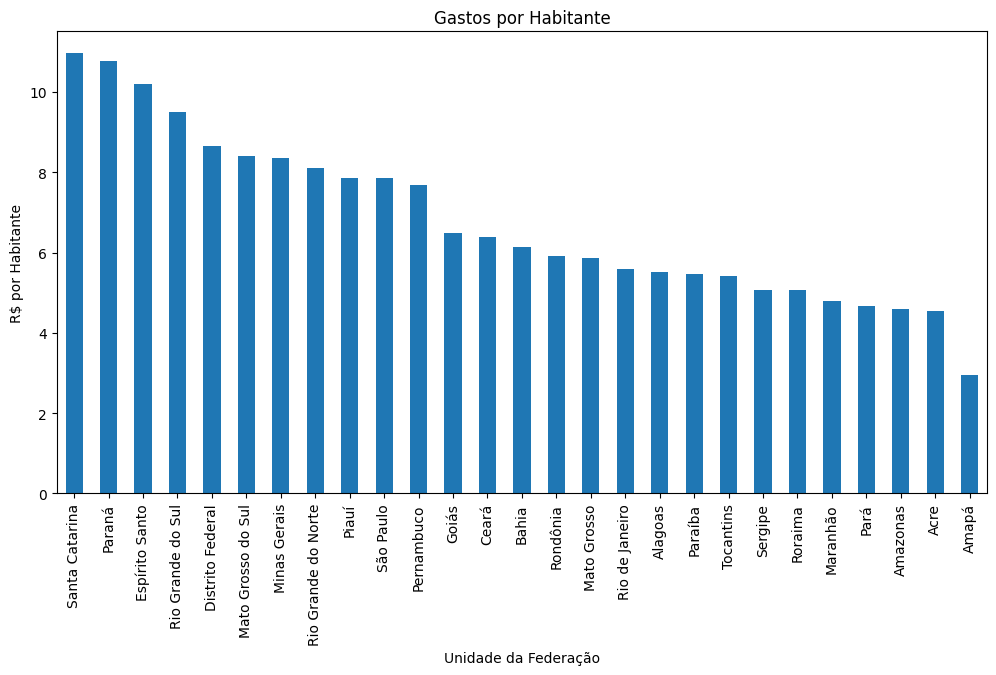

In [54]:
plota_gastos_por_habitante(gastos_e_populacao['per_capita'])

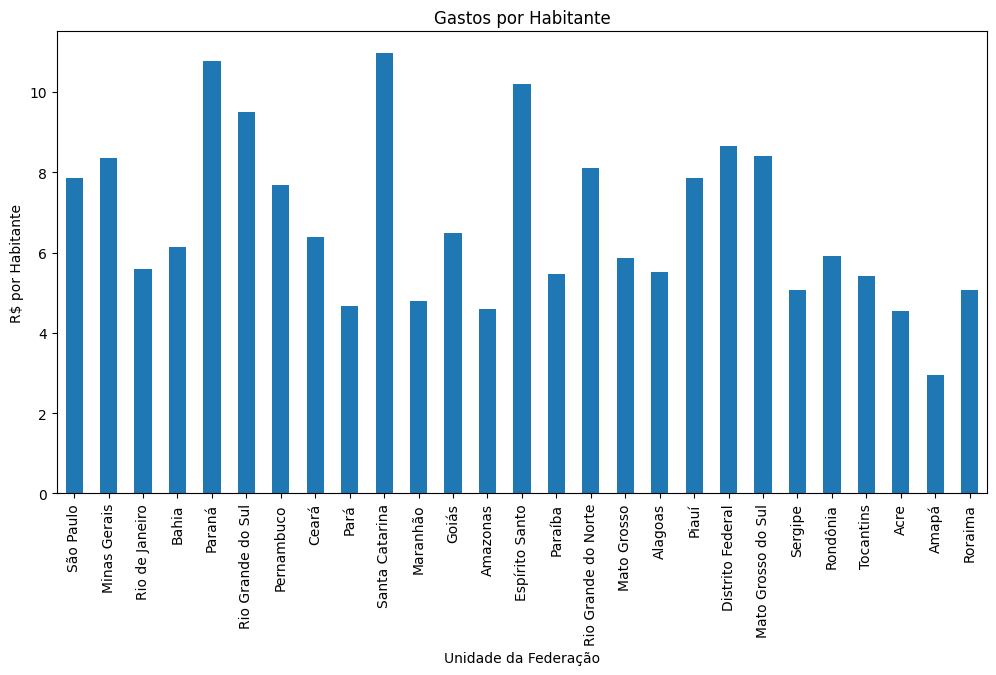

In [55]:
gastos_e_populacao = gastos_e_populacao.sort_values(by='populacao', ascending=False)

plota_gastos_por_habitante(gastos_e_populacao['per_capita'])

<Axes: xlabel='populacao', ylabel='valor'>

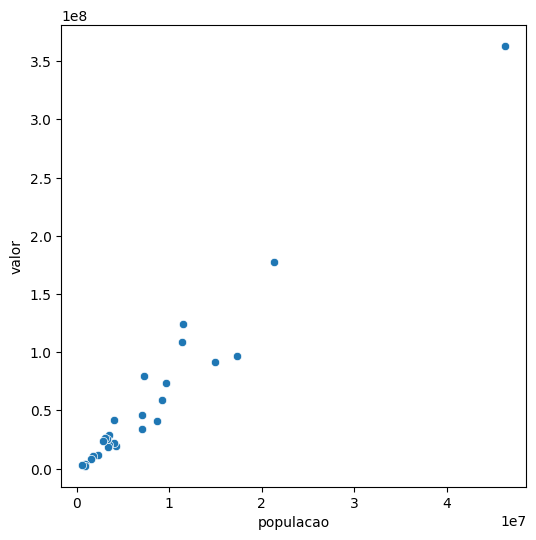

In [56]:
import seaborn as sns

plt.figure(figsize = (6, 6))

sns.scatterplot(data = gastos_e_populacao, x = "populacao", y = "valor")

In [57]:
dados_saude = dados[[primeira_coluna_indice,'2020/Jul']]
dados_saude['Unidade da Federação'] = dados_saude['Unidade da Federação'].str[3:]
dados_saude.columns = ["uf", "valor"]

gastos_e_populacao = ibge_estimativa_uf.join(dados_saude)


<ipython-input-57-10b4b373d41d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_saude['Unidade da Federação'] = dados_saude['Unidade da Federação'].str[3:]


In [75]:
dados_usaveis.sort_values(by="Total", ascending=False, inplace=True)
dados_ordenados_total = dados_usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1100376043.68,173534174.10,170877265.56,170598008.03,172738919.68,...,369693323.78,378705247.74,397943545.45,364780509.99,382652732.95,361359358.77,330406858.79,320644559.73,54647775180.47,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,209426107.11,215330071.63,223305899.96,215057632.27,223870907.80,210645756.95,184552664.46,157534406.37,27719657781.50,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,150631178.11,148707274.41,158656881.75,152909602.75,155905957.12,152665180.66,127198333.25,118541858.89,19859818681.96,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,114184332.05,114910411.43,121099335.74,114655395.64,119051167.56,113269777.62,97572007.06,82823774.39,16831776183.17,Sul
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,43951349.46,...,120481592.70,125107828.53,126720200.45,123550169.05,130549051.74,121123888.79,105283008.96,83944401.74,14397541659.83,Sudeste


In [79]:
dados_ordenados_total.index = dados_ordenados_total.index.str[3:]

In [80]:
dados_ordenados_total.loc["Minas Gerais"]

2007/Ago        971394.37
2007/Set       2861781.50
2007/Out      10018011.35
2007/Nov      21730281.63
2007/Dez      43429517.54
                ...      
2023/Nov     210645756.95
2023/Dez     184552664.46
2024/Jan     157534406.37
Total      27719657781.50
Região            Sudeste
Name: Minas Gerais, Length: 200, dtype: object

In [121]:
dados_ordenados_total_sem_total = dados_ordenados_total[dados_ordenados_total.columns[17:198]]
dados_ordenados_total_sem_total.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,192865963.11,178837792.38,217240028.96,215407201.02,212918633.38,212865855.01,214267576.99,215503535.32,214765337.37,216373283.05,...,354597488.15,386742311.62,369693323.78,378705247.74,397943545.45,364780509.99,382652732.95,361359358.77,330406858.79,320644559.73
Minas Gerais,99018155.84,83675119.83,100278446.17,91831325.37,97289703.07,95723396.53,100050008.70,98996918.26,98202119.08,96962394.27,...,199387724.62,222871767.16,209426107.11,215330071.63,223305899.96,215057632.27,223870907.80,210645756.95,184552664.46,157534406.37
Paraná,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,...,140837275.03,155973066.43,150631178.11,148707274.41,158656881.75,152909602.75,155905957.12,152665180.66,127198333.25,118541858.89
Rio Grande do Sul,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,...,107921912.16,119920385.49,114184332.05,114910411.43,121099335.74,114655395.64,119051167.56,113269777.62,97572007.06,82823774.39
Rio de Janeiro,60886702.38,40686668.30,52753544.47,48919409.33,51196192.89,57242242.35,53485657.68,51265569.50,48510624.73,48692051.51,...,113788002.79,124809536.70,120481592.70,125107828.53,126720200.45,123550169.05,130549051.74,121123888.79,105283008.96,83944401.74


<Axes: xlabel='None', ylabel='Minas Gerais'>

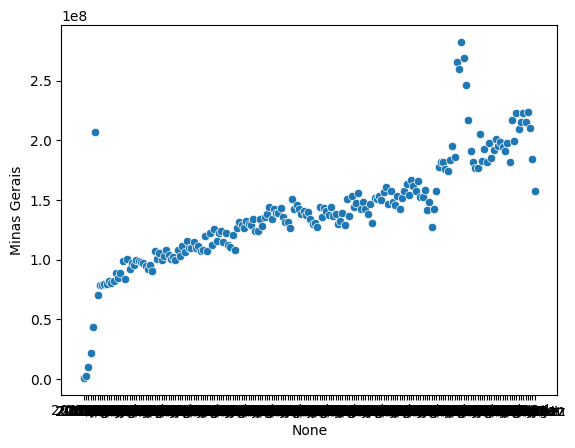

In [91]:
sns.scatterplot(x = dados_ordenados_total_sem_total.columns, y = dados_ordenados_total_sem_total.loc["Minas Gerais"])

In [125]:
mensal = dados_ordenados_total_sem_total.T
mensal = mensal / 1000000

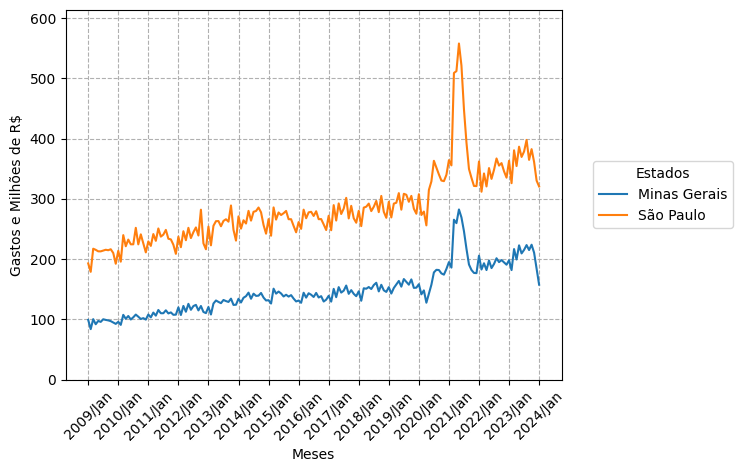

In [141]:
# Comparação entre dois estados
# Desafio organizar o gráfico
uf1 = "Minas Gerais"
uf2 = "São Paulo"

axis1 = sns.lineplot(data = mensal, x = mensal.index, y = uf1, label = uf1)
axis2 = sns.lineplot(data = mensal, x = mensal.index, y=uf2, label = uf2)

ylim_max = max(mensal[uf2].max(), mensal[uf1].max()) * 1.1

axis1.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))

plt.xticks(rotation=45)
plt.xlabel("Meses")
plt.ylabel("Gastos e Milhões de R$")
plt.ylim(0, ylim_max)
plt.legend(title='Estados', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.grid(linestyle="--")

plt.show()